PASO 1: Descargar el Conjunto de Datos desde Google Drive

In [66]:
import gdown

# Enlace de Google Drive (modificado para descarga directa)
url = 'https://drive.google.com/uc?id=1dLpnPAH3cdPJrThsXqLLu9D1FFjk5TsJ'
output = 'PIEZAS_CERAMICAS_MUSEO.csv'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1dLpnPAH3cdPJrThsXqLLu9D1FFjk5TsJ
To: /content/PIEZAS_CERAMICAS_MUSEO.csv
100%|██████████| 859k/859k [00:00<00:00, 104MB/s]


'PIEZAS_CERAMICAS_MUSEO.csv'

PASO 2: Cargar el Conjunto de Datos

In [67]:
import pandas as pd

original_df = pd.read_csv('PIEZAS_CERAMICAS_MUSEO.csv')
print(original_df.columns)

Index(['id', 'Código', 'Fecha de Procedencia', 'Tipo de bien',
       'Tipo de Material', 'Proveniencia', 'Sector', 'Cuadrante', 'Área', 'UE',
       'Unidad (FA)', 'Unidad', 'Capa', 'Nivel', 'Coordenadas',
       'Tipo de Contexto', 'Denominación de Contexto', 'Fecha de excavación',
       'Excavador', 'Contexto', 'Códigos Previos', 'Código Registro Nacional',
       'Nro Ingreso', 'Tipo de Objeto', 'Cultura', 'Periodo',
       'Técnica de Manufactura', 'Técnica de Decoración', 'Descripción',
       'Descripción Decoración', 'Alto', 'Largo', 'Ancho', 'Espesor',
       'Diámetro máximo', 'Diámetro mínimo', 'Diámetro base', 'Peso', 'Sala',
       'Vitrina', 'Depósito', 'Estante', 'Balda', 'Nro Caja',
       'Observación Final', 'Estado de Integridad', 'Estado de Conservación',
       'Inventariador', 'Fecha de Inventario', 'Catalogador Previo',
       'Fecha Catalogador Previo', 'Revisado'],
      dtype='object')


PASO 3: Limpiar los Datos

In [68]:
columns_less_important = ['id', 'Fecha de Procedencia', 'Tipo de bien', 'Cuadrante', 'Área', 'UE',
                         'Unidad (FA)', 'Unidad', 'Capa', 'Nivel', 'Tipo de Contexto', 'Códigos Previos',
                         'Contexto', 'Código Registro Nacional', 'Nro Ingreso', 'Observación Final',
                         'Catalogador Previo', 'Fecha Catalogador Previo', 'Revisado']



In [69]:
#Este codigo remueve del dataframe las columnas previamente declaradas como menos importantes
df = original_df.drop(columns=columns_less_important)
print(df.columns)

Index(['Código', 'Tipo de Material', 'Proveniencia', 'Sector', 'Coordenadas',
       'Denominación de Contexto', 'Fecha de excavación', 'Excavador',
       'Tipo de Objeto', 'Cultura', 'Periodo', 'Técnica de Manufactura',
       'Técnica de Decoración', 'Descripción', 'Descripción Decoración',
       'Alto', 'Largo', 'Ancho', 'Espesor', 'Diámetro máximo',
       'Diámetro mínimo', 'Diámetro base', 'Peso', 'Sala', 'Vitrina',
       'Depósito', 'Estante', 'Balda', 'Nro Caja', 'Estado de Integridad',
       'Estado de Conservación', 'Inventariador', 'Fecha de Inventario'],
      dtype='object')


In [70]:
df.shape

(1176, 33)

#### PASO 4: Exploración visual (EDA) de los datos




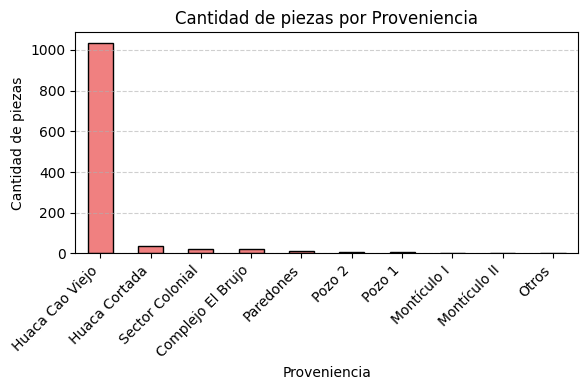

In [71]:
import matplotlib.pyplot as plt

piezas_por_origen = df['Proveniencia'].value_counts()
# Crea la gráfica
plt.figure(figsize=(6, 4))
piezas_por_origen.plot(kind='bar', color='lightcoral', edgecolor='black')

# Estilo de la gráfica
plt.title('Cantidad de piezas por Proveniencia')
plt.xlabel('Proveniencia')
plt.ylabel('Cantidad de piezas')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

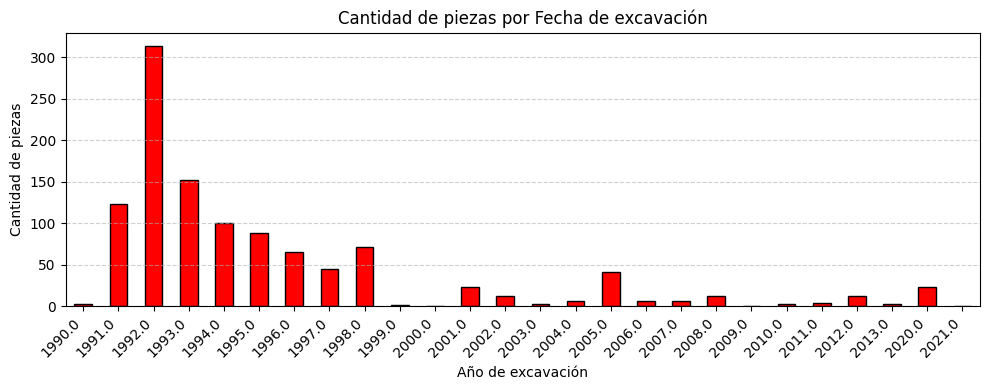

In [72]:
import matplotlib.pyplot as plt

# Extraemos el año de la fecha
# Aseguramos que la columna sea tipo fecha
df['Fecha de excavación'] = pd.to_datetime(df['Fecha de excavación'], errors='coerce')
df['Año de excavación'] = df['Fecha de excavación'].dt.year
piezas_por_año = df['Año de excavación'].value_counts().sort_index()

# Crea la gráfica
plt.figure(figsize=(10, 4))
piezas_por_año.plot(kind='bar', color='red', edgecolor='black')

# Estilo de la gráfica
plt.title('Cantidad de piezas por Fecha de excavación')
plt.xlabel('Año de excavación')
plt.ylabel('Cantidad de piezas')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

PASO 5: Manejar Datos Faltantes y Filtrar por Año




In [73]:
df['Proveniencia'] = df['Proveniencia'].fillna('desconocido')
df['Fecha de excavación'] = pd.to_datetime(df['Fecha de excavación'], errors='coerce')
df['Año de excavación'] = df['Fecha de excavación'].dt.year
# En vista a las gráficas anteriores hacemos una análisis solo de los años donde hay más piezas (Usted puede cambiarlo)
df = df[df['Año de excavación'].isin([1991, 1992, 1993])]

In [74]:
df.shape

(590, 34)

#### PASO 6: Seleccionar Características para la Agrupación

Seleccionar características que podrían indicar agrupaciones con alta cantidad de registros:


Categóricas: 'Proveniencia', 'Tipo de Objeto', 'Cultura'



Numéricas: 'Año de excavación', 'Alto', 'Largo', 'Ancho', 'Peso'

In [75]:
features = ['Proveniencia', 'Año de excavación', 'Tipo de Objeto', 'Cultura', 'Alto', 'Largo', 'Ancho', 'Peso']
df_cluster = df[features].copy()

In [76]:
df_cluster.head()

,Proveniencia,Año de excavación,Tipo de Objeto,Cultura,Alto,Largo,Ancho,Peso
0,Huaca Cao Viejo,1992.0,Miniatura,Lambayeque,37,0,0,20.7
41,Huaca Cao Viejo,1991.0,Piruro,Lambayeque,16,0,0,4.0
128,Huaca Cao Viejo,1992.0,Miniatura,Lambayeque,29,34,0,10.0
130,Huaca Cao Viejo,1993.0,Miniatura,Lambayeque,51,0,0,31.0
133,Huaca Cao Viejo,1993.0,Miniatura,Lambayeque,29,42,0,17.0


PASO 7: Codificar Características Categóricas

In [77]:
df_cluster = pd.get_dummies(df_cluster, columns=['Proveniencia', 'Tipo de Objeto', 'Cultura'], drop_first=True)

In [78]:
df_cluster.head()

,Año de excavación,Alto,Largo,Ancho,Peso,Proveniencia_Paredones,Tipo de Objeto_Canchero,Tipo de Objeto_Colgante,Tipo de Objeto_Cuenco,Tipo de Objeto_Cuenta,...,Tipo de Objeto_Piruro,Tipo de Objeto_Plato,Tipo de Objeto_Silbato,Tipo de Objeto_Tobera,Tipo de Objeto_Trompeta,Cultura_Chimú-Inca,Cultura_Cupisnique,Cultura_Lambayeque,Cultura_Mochica,Cultura_Transicional
0,1992.0,37,0,0,20.7,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
41,1991.0,16,0,0,4.0,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False
128,1992.0,29,34,0,10.0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
130,1993.0,51,0,0,31.0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
133,1993.0,29,42,0,17.0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


#### PASO 8: Imputar Valores Numéricos Faltantes

In [79]:
df_cluster['Año de excavación'].fillna(df_cluster['Año de excavación'].median(), inplace=True)
df_cluster['Alto'].fillna(df_cluster['Alto'].median(), inplace=True)
df_cluster['Largo'].fillna(df_cluster['Largo'].median(), inplace=True)
df_cluster['Ancho'].fillna(df_cluster['Ancho'].median(), inplace=True)
df_cluster['Peso'].fillna(df_cluster['Peso'].median(), inplace=True)

<ipython-input-79-1cef52adb172>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cluster['Año de excavación'].fillna(df_cluster['Año de excavación'].median(), inplace=True)
<ipython-input-79-1cef52adb172>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing '

In [80]:
df_cluster.head()

,Año de excavación,Alto,Largo,Ancho,Peso,Proveniencia_Paredones,Tipo de Objeto_Canchero,Tipo de Objeto_Colgante,Tipo de Objeto_Cuenco,Tipo de Objeto_Cuenta,...,Tipo de Objeto_Piruro,Tipo de Objeto_Plato,Tipo de Objeto_Silbato,Tipo de Objeto_Tobera,Tipo de Objeto_Trompeta,Cultura_Chimú-Inca,Cultura_Cupisnique,Cultura_Lambayeque,Cultura_Mochica,Cultura_Transicional
0,1992.0,37,0,0,20.7,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
41,1991.0,16,0,0,4.0,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False
128,1992.0,29,34,0,10.0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
130,1993.0,51,0,0,31.0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
133,1993.0,29,42,0,17.0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


#### PASO 9: Aplicar Agrupación K-Means y Medir el Coeficiente de Silueta

Usar K-Means para identificar agrupaciones, determinar el número óptimo de clusters con el método del codo y evaluar con el coeficiente de silueta.

In [81]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Estandarizar los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

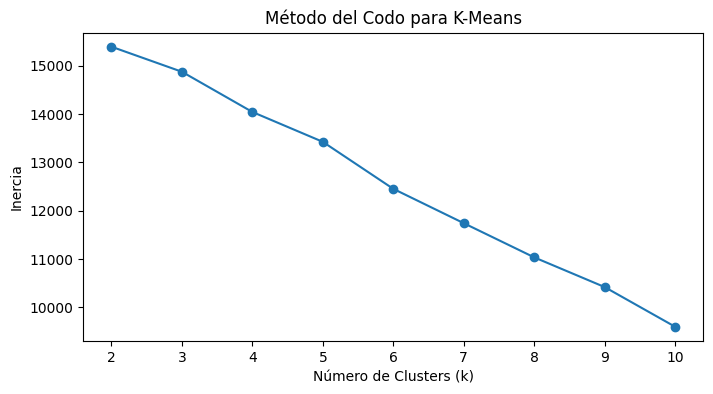

In [82]:
# Método del codo para encontrar el k óptimo
inertia = []
silhouette_scores = []
for k in range(2, 11):  # Comienza desde 2 porque el coeficiente de silueta no se define para k=1
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(df_scaled, labels))

plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Método del Codo para K-Means')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.savefig('metodo_codo.png')
plt.show()

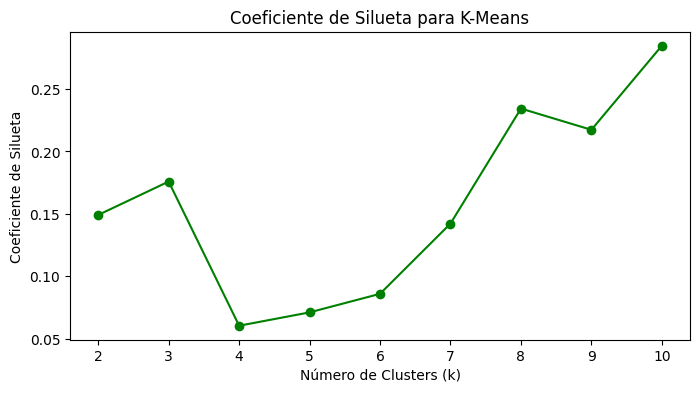

In [83]:
# Graficar el coeficiente de silueta para diferentes k
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores, marker='o', color='green')
plt.title('Coeficiente de Silueta para K-Means')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Coeficiente de Silueta')
plt.savefig('silhouette_kmeans.png')
plt.show()

In [84]:
# Elegir k con el mayor coeficiente de silueta
optimal_k = range(2, 11)[silhouette_scores.index(max(silhouette_scores))]
print(f"Número óptimo de clusters según silueta: {optimal_k}")


Número óptimo de clusters según silueta: 10


In [85]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans

KMeans(n_clusters=10, random_state=42)

In [86]:
df_cluster['Cluster'] = kmeans.fit_predict(df_scaled)

In [87]:
# Contar registros por cluster
cluster_counts = df_cluster['Cluster'].value_counts()
print(cluster_counts)
largest_cluster = cluster_counts.idxmax()
print(f"Agrupación más grande: {largest_cluster} con {cluster_counts[largest_cluster]} cerámicas")

Cluster
3    238
1    141
0    100
9     42
2     32
5     24
8      4
6      4
4      3
7      2
Name: count, dtype: int64
Agrupación más grande: 3 con 238 cerámicas


In [88]:
# Calcular el coeficiente de silueta para el k óptimo
silhouette_avg_kmeans = silhouette_score(df_scaled, df_cluster['Cluster'])
print(f"Coeficiente de silueta promedio para K-Means con k={optimal_k}: {silhouette_avg_kmeans}")

Coeficiente de silueta promedio para K-Means con k=10: 0.2846350328078573


In [89]:
# Resumen de las agrupaciones K-Means
kmeans_summary = df_cluster.groupby('Cluster').mean()
print("Resumen de las Agrupaciones K-Means:")
kmeans_summary

Resumen de las Agrupaciones K-Means:


,Año de excavación,Alto,Largo,Ancho,Peso,Proveniencia_Paredones,Tipo de Objeto_Canchero,Tipo de Objeto_Colgante,Tipo de Objeto_Cuenco,Tipo de Objeto_Cuenta,...,Tipo de Objeto_Piruro,Tipo de Objeto_Plato,Tipo de Objeto_Silbato,Tipo de Objeto_Tobera,Tipo de Objeto_Trompeta,Cultura_Chimú-Inca,Cultura_Cupisnique,Cultura_Lambayeque,Cultura_Mochica,Cultura_Transicional
Cluster,,,,,,,,,,,,,,,,,,,,,
0,1991.950000,77.630000,0.100000,0.020000,459.312000,0.000000,0.0,0.0,0.000000,0.01,...,0.000000,0.99,0.0,0.000000,0.000000,0.000000,0.0,0.980000,0.00000,0.000000
1,1991.985816,176.978723,116.808511,50.276596,588.127660,0.014184,0.0,0.0,0.000000,0.00,...,0.000000,0.00,0.0,0.000000,0.007092,0.000000,0.0,0.709220,0.06383,0.042553
2,1991.968750,67.968750,41.468750,69.968750,119.281250,0.000000,0.0,0.0,0.000000,0.00,...,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.0,0.968750,0.00000,0.000000
3,1992.037815,103.436975,0.521008,0.000000,437.447059,0.004202,0.0,0.0,0.016807,0.00,...,0.113445,0.00,0.0,0.004202,0.000000,0.008403,0.0,0.966387,0.00000,0.000000
4,1992.000000,17.333333,0.000000,0.000000,5.100000,1.000000,0.0,0.0,0.000000,0.00,...,1.000000,0.00,0.0,0.000000,0.000000,0.000000,1.0,0.000000,0.00000,0.000000
5,1992.250000,20.208333,48.750000,54.291667,59.083333,0.000000,0.0,0.0,0.000000,0.00,...,0.000000,0.00,1.0,0.000000,0.000000,0.000000,0.0,1.000000,0.00000,0.000000
6,1992.750000,10.000000,53.750000,20.500000,22.525000,0.000000,0.0,0.0,0.000000,0.00,...,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.0,1.000000,0.00000,0.000000
7,1993.000000,50.000000,135.000000,0.000000,563.500000,0.000000,1.0,0.0,0.000000,0.00,...,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.0,0.000000,1.00000,0.000000
8,1992.250000,0.000000,43.500000,20.250000,9.150000,0.000000,0.0,1.0,0.000000,0.00,...,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.0,1.000000,0.00000,0.000000


#### PASO 10: Aplicar Agrupación DBSCAN y Medir el Coeficiente de Silueta


In [90]:
from sklearn.cluster import DBSCAN

# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
df_cluster['Cluster_DBSCAN'] = dbscan.fit_predict(df_scaled)

In [91]:
# Contar registros por cluster (excluyendo ruido, etiquetado como -1)
cluster_counts_dbscan = df_cluster['Cluster_DBSCAN'][df_cluster['Cluster_DBSCAN'] != -1].value_counts()
print(cluster_counts_dbscan)

Cluster_DBSCAN
4     57
16    52
2     30
18    27
17    24
19    23
15    21
3     18
10    18
8     16
7     10
11     8
13     8
0      7
5      7
9      7
1      6
20     6
14     6
6      5
12     5
21     5
22     5
Name: count, dtype: int64


In [92]:
# Calcular el coeficiente de silueta solo si hay clusters (excluyendo ruido)
if len(cluster_counts_dbscan) > 1:  # Necesitamos al menos 2 clusters para calcular la silueta
    silhouette_avg_dbscan = silhouette_score(df_scaled[df_cluster['Cluster_DBSCAN'] != -1],
                                             df_cluster['Cluster_DBSCAN'][df_cluster['Cluster_DBSCAN'] != -1])
    print(f"Coeficiente de silueta promedio para DBSCAN: {silhouette_avg_dbscan}")
else:
    print("No se puede calcular el coeficiente de silueta: menos de 2 clusters formados o todos los puntos son ruido.")
    silhouette_avg_dbscan = None

if not cluster_counts_dbscan.empty:
    largest_cluster_dbscan = cluster_counts_dbscan.idxmax()
    print(f"Agrupación más grande de DBSCAN: {largest_cluster_dbscan} con {cluster_counts_dbscan[largest_cluster_dbscan]} cerámicas")
else:
    print("No se encontraron agrupaciones; todos los puntos se consideran ruido.")

Coeficiente de silueta promedio para DBSCAN: 0.6496642777779846
Agrupación más grande de DBSCAN: 4 con 57 cerámicas


In [93]:
# Resumen de las agrupaciones DBSCAN
dbscan_summary = df_cluster[df_cluster['Cluster_DBSCAN'] != -1].groupby('Cluster_DBSCAN').mean()
print("Resumen de las Agrupaciones DBSCAN:")
dbscan_summary

Resumen de las Agrupaciones DBSCAN:


,Año de excavación,Alto,Largo,Ancho,Peso,Proveniencia_Paredones,Tipo de Objeto_Canchero,Tipo de Objeto_Colgante,Tipo de Objeto_Cuenco,Tipo de Objeto_Cuenta,...,Tipo de Objeto_Plato,Tipo de Objeto_Silbato,Tipo de Objeto_Tobera,Tipo de Objeto_Trompeta,Cultura_Chimú-Inca,Cultura_Cupisnique,Cultura_Lambayeque,Cultura_Mochica,Cultura_Transicional,Cluster
Cluster_DBSCAN,,,,,,,,,,,,,,,,,,,,,
0,1991.0,10.142857,0.000000,0.000000,7.200000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0
1,1992.0,0.000000,69.833333,37.333333,42.833333,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0
2,1993.0,134.300000,0.000000,0.000000,546.266667,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0
3,1993.0,75.111111,0.000000,0.000000,451.111111,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1992.0,127.263158,0.000000,0.000000,484.263158,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0
5,1993.0,13.857143,0.000000,0.000000,3.142857,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0
6,1992.0,18.800000,0.000000,0.000000,7.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0
7,1992.0,14.800000,0.000000,0.000000,4.480000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0
8,1993.0,0.000000,68.937500,43.562500,47.562500,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9.0


#### Visualización

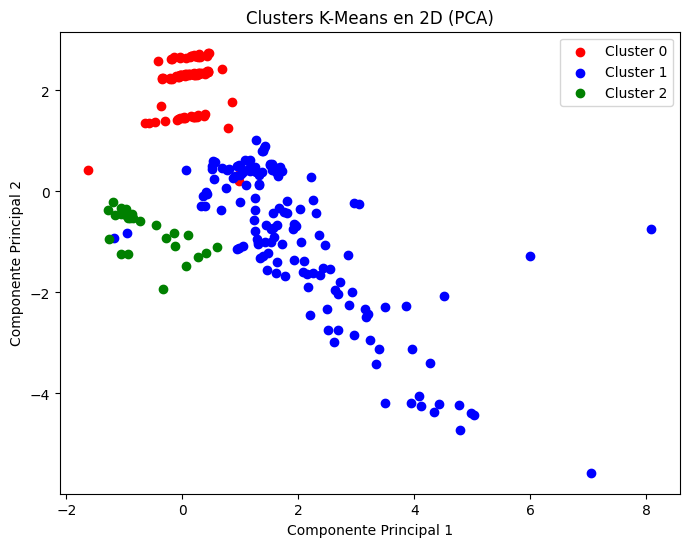

In [95]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Estandarizar los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

# Reducir a 2 dimensiones usando PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Visualizar clusters de K-Means
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[df_cluster['Cluster'] == 0, 0], df_pca[df_cluster['Cluster'] == 0, 1], c='red', label='Cluster 0')
plt.scatter(df_pca[df_cluster['Cluster'] == 1, 0], df_pca[df_cluster['Cluster'] == 1, 1], c='blue', label='Cluster 1')
if len(df_cluster['Cluster'].unique()) > 2:
    plt.scatter(df_pca[df_cluster['Cluster'] == 2, 0], df_pca[df_cluster['Cluster'] == 2, 1], c='green', label='Cluster 2')
plt.title('Clusters K-Means en 2D (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.savefig('kmeans_clusters_2d.png')
plt.show()

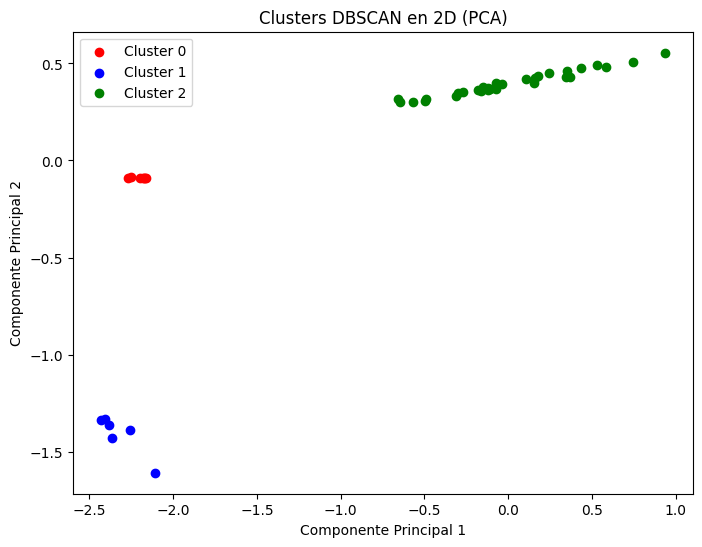

In [97]:
# Visualizar clusters de DBSCAN
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[df_cluster['Cluster_DBSCAN'] == 0, 0], df_pca[df_cluster['Cluster_DBSCAN'] == 0, 1], c='red', label='Cluster 0')
plt.scatter(df_pca[df_cluster['Cluster_DBSCAN'] == 1, 0], df_pca[df_cluster['Cluster_DBSCAN'] == 1, 1], c='blue', label='Cluster 1')
if len(df_cluster['Cluster_DBSCAN'].unique()) > 2:
    plt.scatter(df_pca[df_cluster['Cluster_DBSCAN'] == 2, 0], df_pca[df_cluster['Cluster_DBSCAN'] == 2, 1], c='green', label='Cluster 2')
#plt.scatter(df_pca[df_cluster['Cluster_DBSCAN'] == -1, 0], df_pca[df_cluster['Cluster_DBSCAN'] == -1, 1], c='black', label='Ruido')
plt.title('Clusters DBSCAN en 2D (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.savefig('dbscan_clusters_2d.png')
plt.show()